# ANDREJ PLAYLIST - VIDEO 1

In [1]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [3]:
def f(x):
  return 3*x**2 - 4*x + 5

In [4]:
def f_my_x(x):
    return 5+4*3*x**2+1

In [5]:
f(10)

265

In [6]:
f_my_x(3)

114

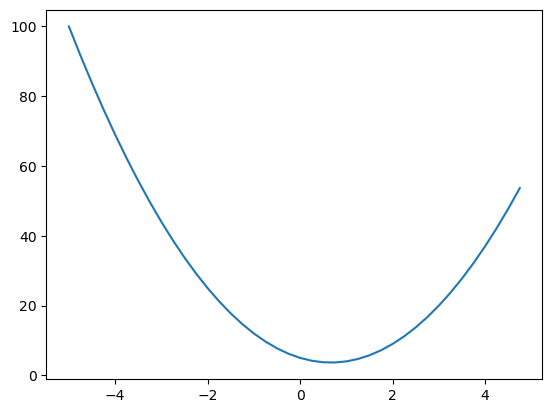

In [7]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [8]:
h=0.0001
x=3
print(f"Original = {f(x)}")
print(f"When added h = {f(x+h)}")

Original = 20
When added h = 20.001400030000006


Can observe it will go up

In [9]:
print(f"Difference is = {(f(x+h)-f(x))/h}")

Difference is = 14.000300000063248


In [10]:
# here at this point derivative is 0
h = 0.000001
x = 2/3
(f(x + h) - f(x))/h

2.999378523327323e-06

In [11]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [12]:
#getting derivatives for multiple values : A
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c # this is the normal value
a += h #bumping up the value by h
d2 = a*b + c # new bumped up value
#---------------------------------

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [13]:
#getting derivatives for multiple values : B
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c # this is the normal value
b += h #bumping up the value by h
d2 = a*b + c # new bumped up value
#---------------------------------

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [14]:
#getting derivatives for multiple values : C
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c # this is the normal value
c += h #bumping up the value by h
d2 = a*b + c # new bumped up value
#---------------------------------

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [15]:
class Value:

    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
    def __repr__(self):
        return f"Value(data={self.data})"
  
    def __add__(self, other):
        out = Value(self.data + other.data,(self, other), '+')
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

a=Value(2.0)
b=Value(-3.0)
c=Value(10.0)
d=a*b+c

In [16]:
print(a)
print(b)
print(c)
print(d)

Value(data=2.0)
Value(data=-3.0)
Value(data=10.0)
Value(data=4.0)


In [17]:
a*b

Value(data=-6.0)

In [18]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [19]:
d._op

'+'

In [20]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
  
    def __add__(self, other):
        out = Value(self.data + other.data,(self, other), '+')
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d=a*b+c; d.label = 'd'

In [21]:
#copypaste from Andrej code for visualizing the expression:
# from graphviz import Digraph

# def trace(root):
#   # builds a set of all nodes and edges in a graph
#   nodes, edges = set(), set()
#   def build(v):
#     if v not in nodes:
#       nodes.add(v)
#       for child in v._prev:
#         edges.add((child, v))
#         build(child)
#   build(root)
#   return nodes, edges

# def draw_dot(root):
#   dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
#   nodes, edges = trace(root)
#   for n in nodes:
#     uid = str(id(n))
#     # for any value in the graph, create a rectangular ('record') node for it
#     dot.node(name = uid, label = "{ %s | data %.4f  }" % (n.label, n.data), shape='record')
#     if n._op:
#       # if this value is a result of some operation, create an op node for it
#       dot.node(name = uid + n._op, label = n._op)
#       # and connect this node to it
#       dot.edge(uid + n._op, uid)

#   for n1, n2 in edges:
#     # connect n1 to the op node of n2
#     dot.edge(str(id(n1)), str(id(n2)) + n2._op)

#   return dot



# GIVING SOME ERRORS SINCE THIS CODE WAS SOMETHING ELSE IN THE VIDEO

In [22]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [23]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

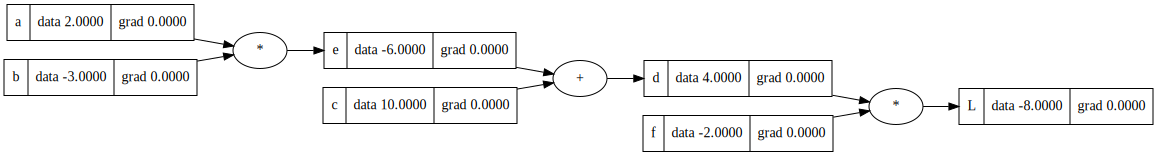

In [24]:
draw_dot(L)


In [25]:
#Not able to get what this is so moving further for now..

In [26]:
# def lol():
#     h = 0.001
  
#     a = Value(2.0, label='a')
#     b = Value(-3.0, label='b')
#     c = Value(10.0, label='c')
#     e = a*b; e.label = 'e'
#     d = e + c; d.label = 'd'
#     f = Value(-2.0, label='f')
#     L = d * f; L.label = 'L'
#     L1 = L.data
#     print(L1)

In [27]:
# lol()

In [28]:
#measuring effect of A



In [29]:
def lol():
    h = 0.001
  
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data
    print(L1)
    
#------------------------------------------------------------------
    a = Value(2.0+h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data
    print(L2)
    
    print((L2-L1)/h)
    
lol()

-8.0
-7.994
6.000000000000227


this is for when the value A is changed... so now when we check for L we will add h directly to which would obviously give us 1.

In [30]:
#manually setting grad of L here :
L.grad=1.0

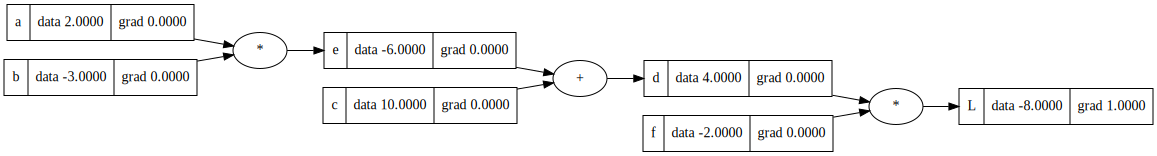

In [31]:
draw_dot(L)

In [32]:
#didnt really assing the grads here but i got the process.

In [33]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.7, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'


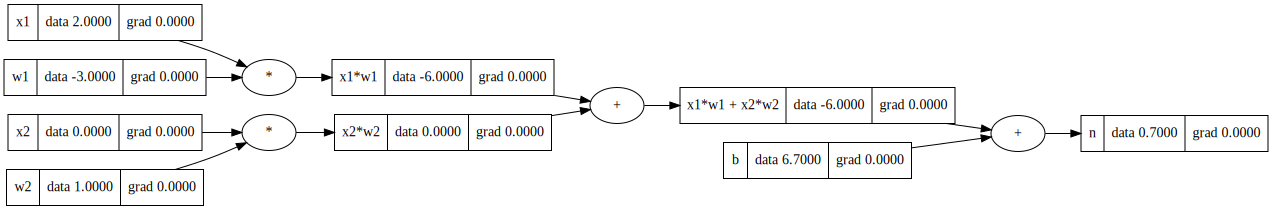

In [34]:
draw_dot(n)


The above daigram is the NN without the activation fucntion

In [35]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.7, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

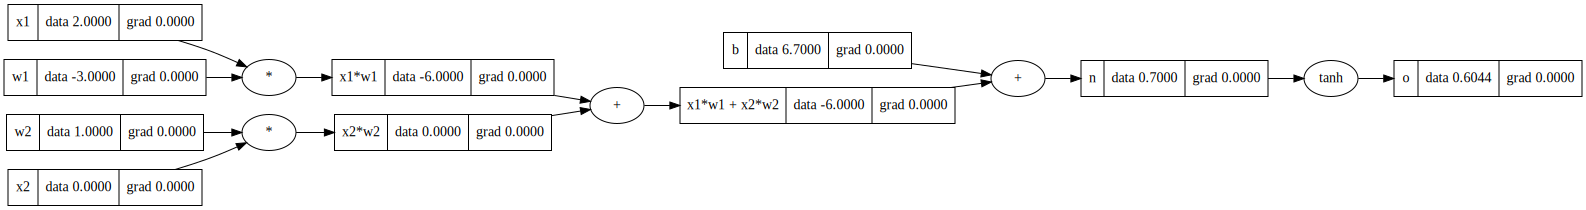

In [36]:
draw_dot(o)

in the video he explains the math and sets the gradients directly....with the same logic written above in this code...

so grad of o will be 1 
n will be...the formula used was 1-tanh**2 which was something 0.4..

So i wont go set all these manually for now.(moving further with the video)

So the things we did manually for operations like + * and tanh...we put backward functions for each operation which is done above in the class Value 

In [37]:
o.grad=1


In [38]:
o._backward()

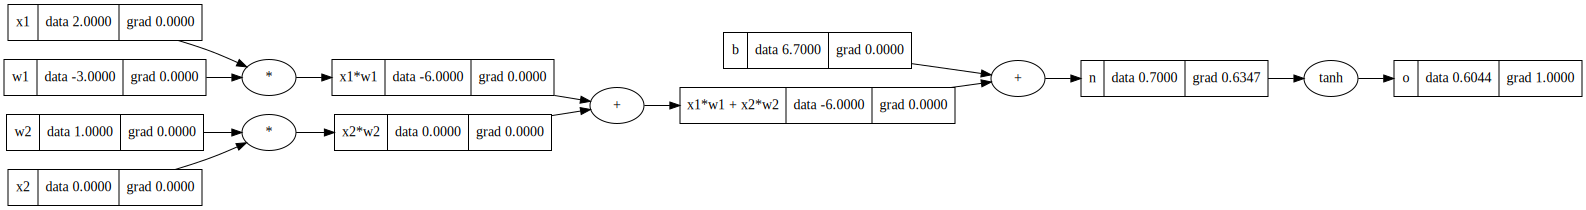

In [39]:
draw_dot(o)

In [40]:
n._backward()

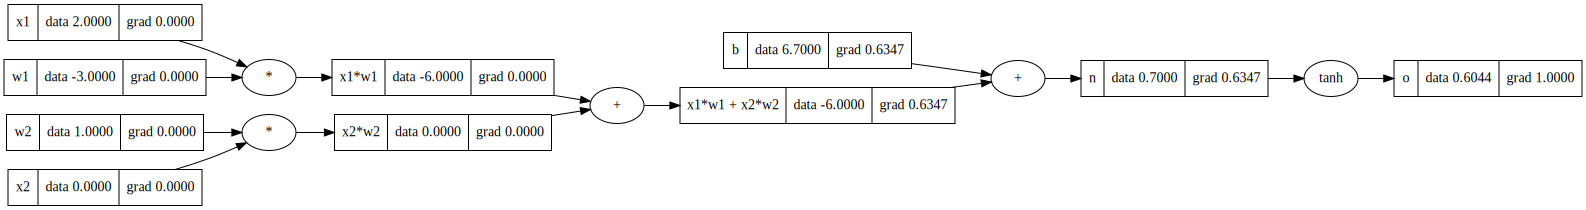

In [41]:
draw_dot(o)

In [42]:
x1w1x2w2._backward()

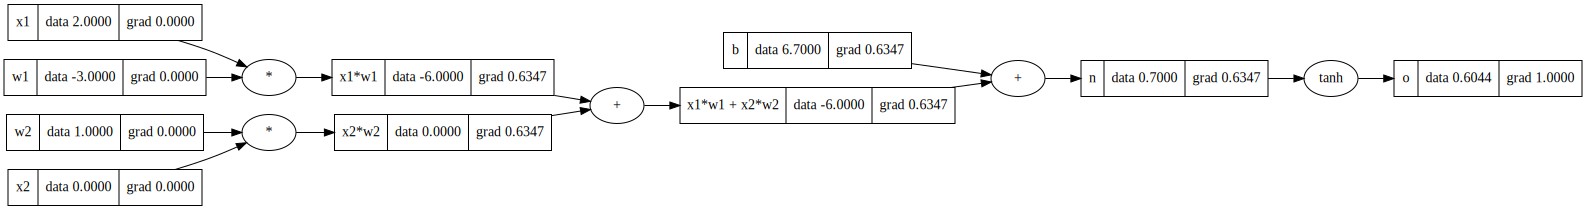

In [43]:
draw_dot(o)

In [44]:
x2w2._backward()

x1w1._backward()

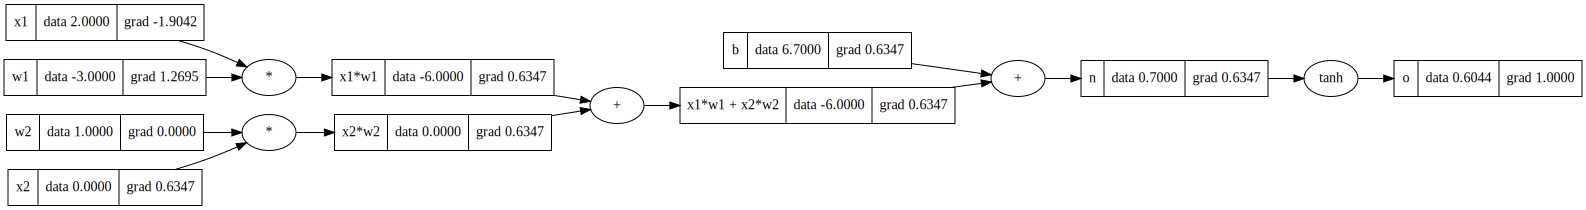

In [45]:
draw_dot(o)

In [46]:
#in the above code we were calling ._backward manually in the sequence...to automate that we are using topological sort which will put the variables in the single direction 
# copied the code directly from his code/
# we have put this code in the class Value
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

[Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.7),
 Value(data=0.7000000000000002),
 Value(data=0.6043677771171636)]

In [47]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.7, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

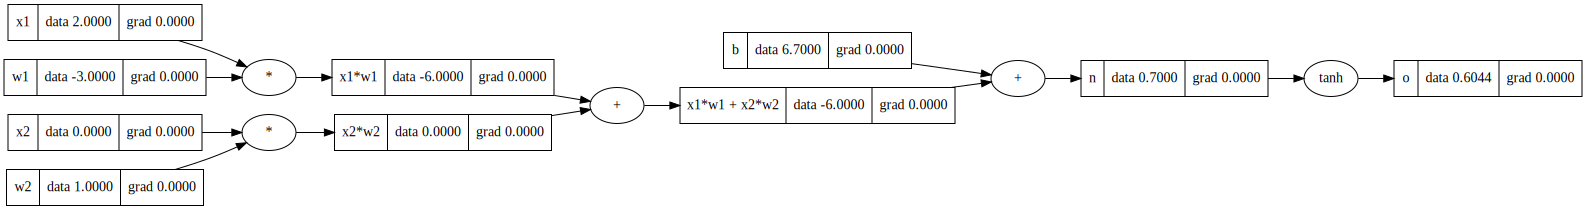

In [48]:
draw_dot(o)

In [49]:
o.backward()

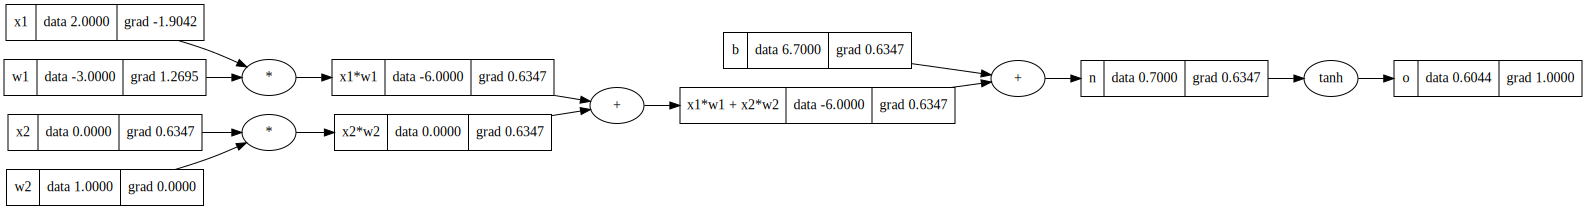

In [50]:
draw_dot(o)

# previously in the code the gradients were being overwrittten when the variables were used more than once...so we made the change in the code where we now ACCMULAte the Grad values by using +=

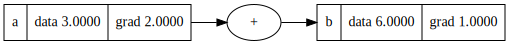

In [51]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

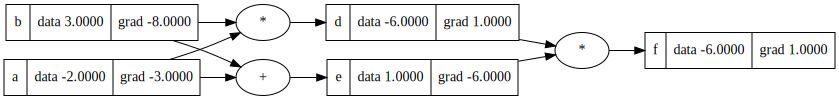

In [52]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

--------------------------------------------------


----------------------------------

# Moving to the Second Part of the video : 

## Now we try to make the expression more complicated...we implement the tanh function on our own :


In [53]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward
    
    return out
  
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [54]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

### Previously the graph is :

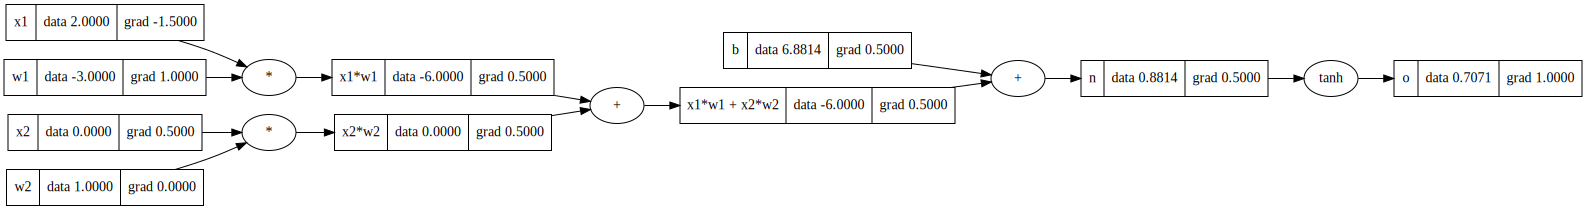

In [55]:
draw_dot(o)

### Implementing it manually : 

In [56]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'


e = (2*n).exp()
o = (e - 1) / (e + 1)

o.label = 'o'
o.backward()


### The new graph is :

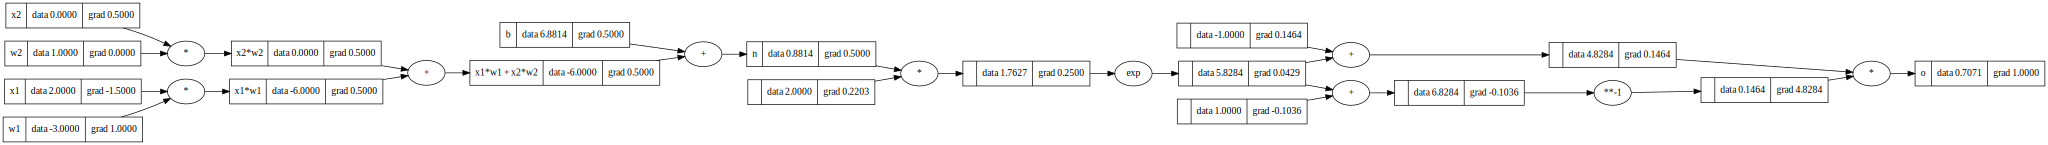

In [57]:
draw_dot(o)

# USING PYTORCH :

In [77]:
import torch
import random

In [69]:
a=torch.Tensor([[1,2,3],[1,2,3]])
a
a.dtype

torch.float32

In [74]:
print(a.grad)
print(x1.grad)

None
tensor([-1.5000], dtype=torch.float64)


In [111]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [112]:
# class Neuron:
  
#   def __init__(self, nin):
#     self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
#     self.b = Value(random.uniform(-1,1))
  
#   def __call__(self, x):
#     # w * x + b
    
#     act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
#     out = act.tanh()
#     return out

# class Layer:
  
#   def __init__(self, nin, nout):
#     self.neurons = [Neuron(nin) for _ in range(nout)]
  
#   def __call__(self, x):
#     outs = [n(x) for n in self.neurons]
#     return outs

In [113]:
# n = Layer(2,3)
# x=[2.0,3.0]
# n(x)
# #--------------------------


In [114]:
# main code from Andrej book:

In [132]:
class Neuron:
  
  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))
  
  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out
  
  def parameters(self):
    return self.w + [self.b]

class Layer:
  
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]
  
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
  
  def __call__(self, x):
        
    for layer in self.layers:
      x = layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]


In [133]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.9238965351170014)

In [134]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [135]:
ypreds=[n(x) for x in xs]
ypreds

[Value(data=0.9238965351170014),
 Value(data=0.41575291973838974),
 Value(data=0.22558509028771323),
 Value(data=0.8784916311483022)]

In [136]:
[(yout-ygt)**2 for ygt,yout in zip(ys,ypreds)]

[Value(data=0.005791737367197797),
 Value(data=2.0043563297477758),
 Value(data=1.5020588135355422),
 Value(data=0.014764283701000244)]

In [137]:
loss=sum([(yout-ygt)**2 for ygt,yout in zip(ys,ypreds)])
loss

Value(data=3.526971164351516)

In [138]:
loss.backward()

In [140]:
#draw_dot(loss)

In [142]:
# INstead of doing the  steps manually for forward pass then backward pass and then update to check...here it is in one go for 20 iterations:


In [127]:
for k in range(20):
  
  # forward pass
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()
  
  # update
    for p in n.parameters():
        p.data += -0.1 * p.grad
  
    print(k, loss.data)

0 6.476417783098711
1 3.655134532021169
2 2.58612801356084
3 2.3190450544193544
4 1.3453519586337468
5 0.04648532517315408
6 0.031961787579923746
7 0.025224809759985856
8 0.021255024306115936
9 0.018610672473249254
10 0.01670819499585459
11 0.015264136108866372
12 0.014123709210495838
13 0.01319510585262421
14 0.01242039100810274
15 0.011761191176865107
16 0.011191077255867805
17 0.010691249567827132
18 0.01024796664656852
19 0.009850947456830935


In [141]:
ypred


[Value(data=0.9349081627955163),
 Value(data=-0.9581959617155181),
 Value(data=-0.9554144380625743),
 Value(data=0.956657754603511)]